<a href="https://colab.research.google.com/github/runo313/runo313/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

drive.mount('/content/drive')
data_path = '/content/drive/My Drive/Housing.csv'  # Changed file_path to data_path
property_data = pd.DataFrame(pd.read_csv(data_path))  # Changed housing to property_data
property_data.head()


Mounted at /content/drive


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
# Checking Null values
property_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
# List of features to apply binary mapping
binary_features = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning']

# Function to apply binary mapping
def map_binary_features(x):  # Updated from binary_map
    return x.map({'yes': 1, 'no': 0})

# Applying binary mapping to the specified features
property_data[binary_features] = property_data[binary_features].apply(map_binary_features)
property_data.head()  # Displaying the updated dataset


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished


In [5]:
# Setting a random seed for reproducibility
np.random.seed(0)

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(property_data, train_size=0.8, test_size=0.2, random_state=42)


In [3]:
def simple_gradient_descent(X_train_adj, X_val_adj, y_train_adj, y_val_adj, rate_learning, iterations_count):
    # Initializing augmented matrices
    X_b_train_augmented = np.c_[np.ones((len(X_train_adj), 1)), X_train_adj]  # Augmented training features matrix
    X_b_val_augmented = np.c_[np.ones((len(X_val_adj), 1)), X_val_adj]  # Augmented validation features matrix

    # Initializing theta_adj before its first use
    theta_adj = np.zeros((X_train_adj.shape[1] + 1, 1))  # Initialization of theta_adj

    # Lists to store losses for training and validation sets
    losses_train = []  # List to store training losses
    losses_val = []  # List to store validation losses

    # Gradient descent iterations
    for iteration in range(iterations_count):
        gradients_adj = 2/len(X_train_adj) * X_b_train_augmented.T.dot(X_b_train_augmented.dot(theta_adj) - y_train_adj)  # Compute gradients
        theta_adj -= rate_learning * gradients_adj  # Update theta_adj using learning rate and gradients
        loss_training = (1/len(X_train_adj)) * np.sum(np.square(X_b_train_augmented.dot(theta_adj) - y_train_adj))  # Compute current training loss
        loss_validation = (1/len(X_val_adj)) * np.sum(np.square(X_b_val_augmented.dot(theta_adj) - y_val_adj))  # Compute current validation loss
        losses_train.append(loss_training)  # Append current training loss to the list
        losses_val.append(loss_validation)  # Append current validation loss to the list

    return losses_train, losses_val, theta_adj  # Return the lists of losses and the final theta_adj


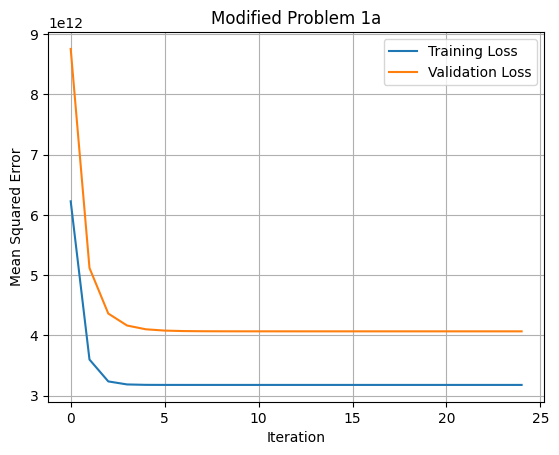

In [8]:
# Setting up the Problem 1a with selected features and initial parameters
selected_features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']  # Features selected for Problem 1a
training_prices = train_data['price'].values.reshape(-1, 1)  # Prices from the training data
training_features = train_data[selected_features_1a].values  # Selected features from the training data
validation_features = test_data[selected_features_1a].values  # Selected features from the test (validation) data
validation_prices = test_data['price'].values.reshape(-1, 1)  # Prices from the test (validation) data

# Gradient descent parameters for Problem 1a
step_size = 0.00000001  # Learning rate for gradient descent
iteration_total = 25  # Total number of iterations for gradient descent
sample_size = len(training_features)  # Number of samples in the training data
initial_theta = np.zeros((training_features.shape[1] + 1, 1))  # Initial theta values for gradient descent

# Applying gradient descent for Problem 1a
losses_train, losses_validation, initial_theta = simple_gradient_descent(training_features, validation_features, training_prices, validation_prices, step_size, iteration_total)  # Updated function call with new variable names

# Plotting training and validation losses for Problem 1a
plt.plot(losses_train, label="Training Loss")
plt.plot(losses_validation, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Modified Problem 1a")
plt.grid(True)


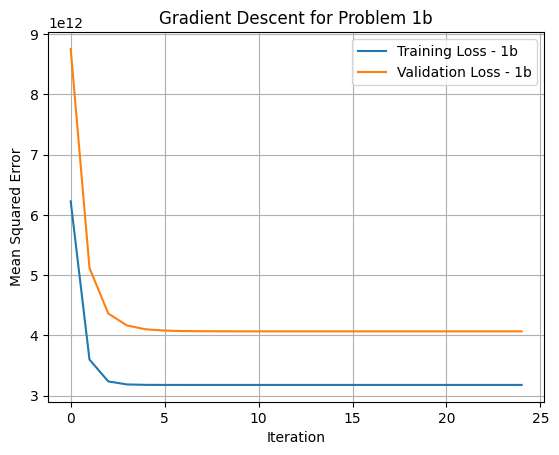

Best parameters for Problem 1a: [[3.31337639e-01 8.37930725e+02 1.12411775e+00 5.60384725e-01
  8.43094194e-01]]
Best parameters for Problem 1b: [[3.31337623e-01 8.37930703e+02 1.12411771e+00 5.60384712e-01
  8.43094170e-01]]


In [ ]:
# Setting up the Problem 1b with extended features and initial parameters
enhanced_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement']  # Extended features for Problem 1b
enhanced_train_features = train_data[enhanced_features].values  # Extended features from the training data
enhanced_train_prices = train_data['price'].values.reshape(-1, 1)  # Prices from the training data
enhanced_validation_features = test_data[enhanced_features].values  # Extended features from the test (validation) data
enhanced_validation_prices = test_data['price'].values.reshape(-1, 1)  # Prices from the test (validation) data

# Gradient descent parameters for Problem 1b
adjustment_rate = 0.00000001  # Learning rate for gradient descent
total_iterations = 25  # Total number of iterations for gradient descent
total_samples = len(enhanced_train_features)  # Number of samples in the extended training data
enhanced_theta = np.zeros((enhanced_train_features.shape[1] + 1, 1))  # Initial theta values for extended gradient descent

# Applying gradient descent for Problem 1b
# Assuming you have a similar function for Problem 1b, otherwise use simple_gradient_descent
losses_train_enhanced, losses_validation_enhanced, enhanced_theta = simple_gradient_descent(enhanced_train_features, enhanced_validation_features, enhanced_train_prices, enhanced_validation_prices, adjustment_rate, total_iterations)

# Plotting training and validation losses for Problem 1b
plt.plot(losses_train_enhanced, label="Training Loss - 1b")
plt.plot(losses_validation_enhanced, label="Validation Loss - 1b")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Gradient Descent for Problem 1b")
plt.grid(True)
plt.show()

# Assuming initial_theta is the result from Problem 1a
print("Best parameters for Problem 1a:", initial_theta[:5].T)  # Replace initial_theta with the actual result variable from Problem 1a if different
print("Best parameters for Problem 1b:", enhanced_theta[:5].T)


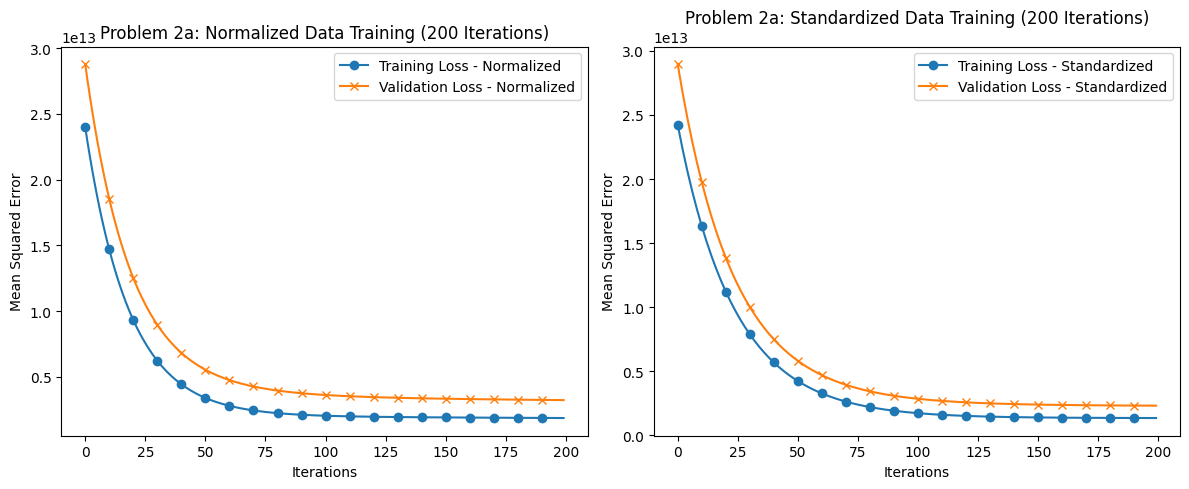

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Assuming the simple_gradient_descent function is defined
# Assuming 'train_data' and 'test_data' are available and contain the training and testing datasets respectively

# Base features for Problem 2a
selected_features_1a = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Extracting training and validation data for the selected features and price
training_features = train_data[selected_features_1a].values
training_prices = train_data['price'].values.reshape(-1, 1)
validation_features = test_data[selected_features_1a].values
validation_prices = test_data['price'].values.reshape(-1, 1)

# Gradient descent parameters
step_size = 0.01
iteration_total = 200

# Normalization
scaler_norm = MinMaxScaler()
training_features_norm = scaler_norm.fit_transform(training_features)
validation_features_norm = scaler_norm.transform(validation_features)

# Gradient Descent with Normalized Features
losses_train_norm, losses_validation_norm, theta_norm = simple_gradient_descent(training_features_norm, validation_features_norm, training_prices, validation_prices, step_size, iteration_total)

# Standardization
scaler_std = StandardScaler()
training_features_std = scaler_std.fit_transform(training_features)
validation_features_std = scaler_std.transform(validation_features)

# Gradient Descent with Standardized Features
losses_train_std, losses_validation_std, theta_std = simple_gradient_descent(training_features_std, validation_features_std, training_prices, validation_prices, step_size, iteration_total)

# Plotting for Problem 2a
plt.figure(figsize=(12, 5))

# Plot for Normalized Data Training
plt.subplot(1, 2, 1)
plt.plot(losses_train_norm, label='Training Loss - Normalized', marker='o', markevery=10)
plt.plot(losses_validation_norm, label='Validation Loss - Normalized', marker='x', markevery=10)
plt.title('Problem 2a: Normalized Data Training (200 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()

# Plot for Standardized Data Training
plt.subplot(1, 2, 2)
plt.plot(losses_train_std, label='Training Loss - Standardized', marker='o', markevery=10)
plt.plot(losses_validation_std, label='Validation Loss - Standardized', marker='x', markevery=10)
plt.title('Problem 2a: Standardized Data Training (200 Iterations)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()

plt.tight_layout()
plt.show()


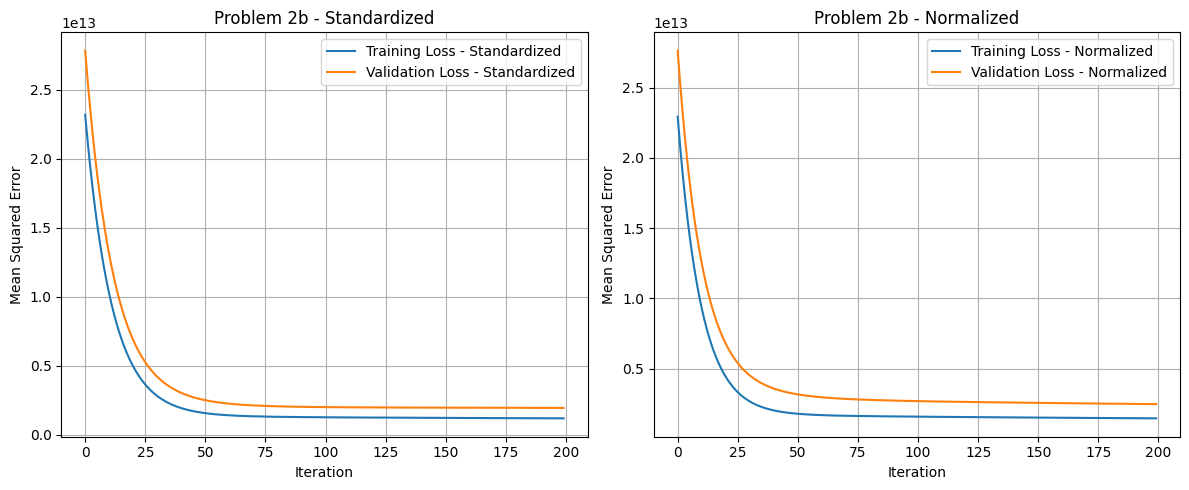

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming the simple_gradient_descent function is defined
# Assuming 'train_data' and 'test_data' are available and contain the training and testing datasets respectively

# Extended features set for Problem 2b, separating numerical and categorical features
extended_features_numerical = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
extended_features_categorical = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
extended_features = extended_features_numerical + extended_features_categorical

# Extracting extended training and validation data
extended_training_prices = train_data['price'].values.reshape(-1, 1)
extended_validation_prices = test_data['price'].values.reshape(-1, 1)

# Setting up preprocessing steps for standardization and normalization
preprocessor_std = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), extended_features_numerical),
        ('cat', OneHotEncoder(drop='first'), extended_features_categorical)  # Assuming binary categorical variables
    ])

preprocessor_norm = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), extended_features_numerical),
        ('cat', OneHotEncoder(drop='first'), extended_features_categorical)  # Assuming binary categorical variables
    ])

# Gradient descent parameters
learning_rate = 0.01
n_iterations = 200

# Standardization
X_train_std = preprocessor_std.fit_transform(train_data[extended_features])
X_val_std = preprocessor_std.transform(test_data[extended_features])

# Train and validate the model using standardized data
train_losses_2b_std, val_losses_2b_std, theta_2b_std = simple_gradient_descent(X_train_std, X_val_std, extended_training_prices, extended_validation_prices, learning_rate, n_iterations)

# Normalization
X_train_norm = preprocessor_norm.fit_transform(train_data[extended_features])
X_val_norm = preprocessor_norm.transform(test_data[extended_features])

# Train and validate the model using normalized data
train_losses_2b_norm, val_losses_2b_norm, theta_2b_norm = simple_gradient_descent(X_train_norm, X_val_norm, extended_training_prices, extended_validation_prices, learning_rate, n_iterations)

# Plotting for Problem 2b
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Standardized data plot
ax1.plot(train_losses_2b_std, label="Training Loss - Standardized")
ax1.plot(val_losses_2b_std, label="Validation Loss - Standardized")
ax1.set_xlabel("Iteration")
ax1.set_ylabel("Mean Squared Error")
ax1.legend()
ax1.set_title("Problem 2b - Standardized")
ax1.grid(True)

# Normalized data plot
ax2.plot(train_losses_2b_norm, label="Training Loss - Normalized")
ax2.plot(val_losses_2b_norm, label="Validation Loss - Normalized")
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Mean Squared Error")
ax2.legend()
ax2.set_title("Problem 2b - Normalized")
ax2.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
print("Best parameters for 2a Normalized:", theta_norm[:5].T)
print("Best parameters for 2a Standardized:", theta_std[:5].T)
#print("Best parameters for 2b Standardized:", theta_ext_std[:5].T)
#print("Best parameters for 2b Normalized:", theta_ext_norm[:5].T)

Best parameters for 2a Normalized: [[3254139.49678981 1185119.82889357 1444895.28934743  692536.76190881
  1222588.64618958]]
Best parameters for 2a Standardized: [[4623749.23296971  664490.23259333  140887.9855782   552319.53494971
   410044.03582123]]


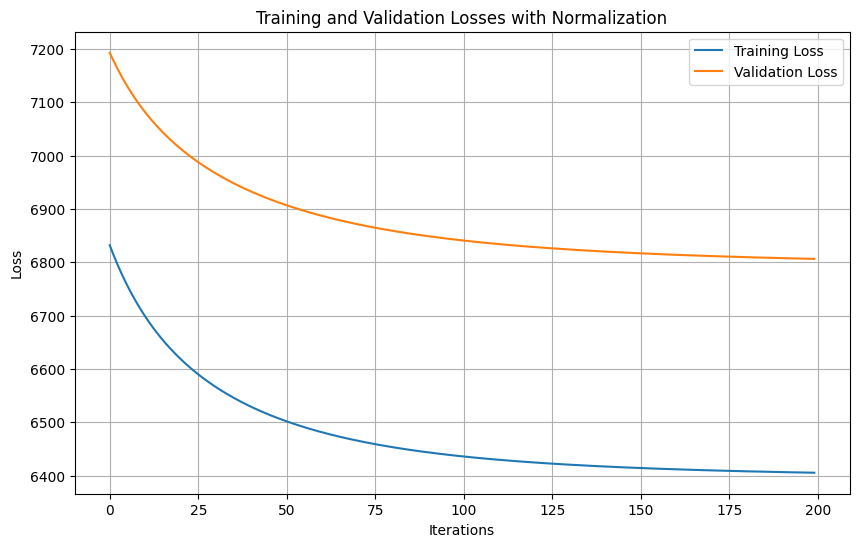

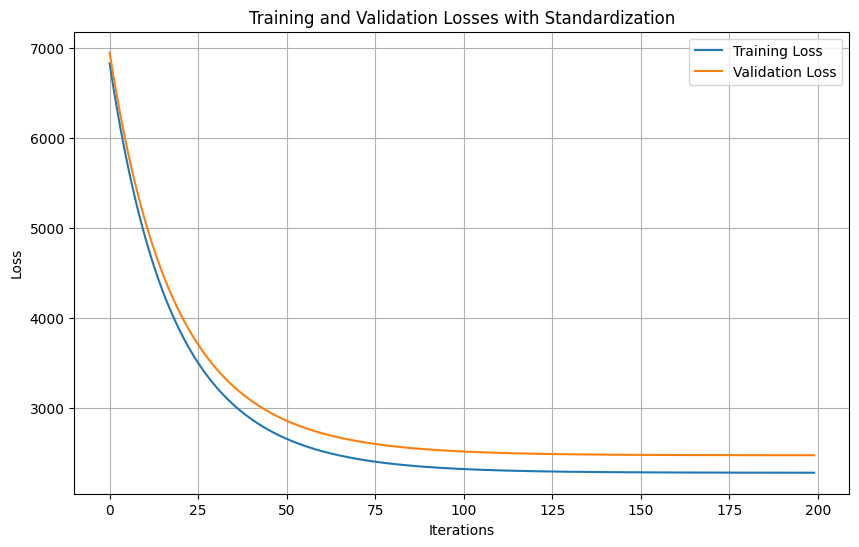

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Generating synthetic data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshaping y to be a column vector

# Splitting the synthetic data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent with Penalty Function
def gradient_descent_penalty(X_train, X_val, y_train, y_val, learning_rate, n_iterations, penalty):
    m = len(y_train)
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]  # Adding bias term
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]  # Adding bias term for validation data

    theta = np.zeros((X_train.shape[1] + 1, 1))  # Initializing theta

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        predictions = X_b_train.dot(theta)
        errors = predictions - y_train
        gradients = 2/m * X_b_train.T.dot(errors)
        gradients[1:] += (2 * penalty / m) * theta[1:]  # Adding L2 penalty for regularization
        theta -= learning_rate * gradients

        train_loss = np.mean(errors ** 2)
        val_loss = np.mean((X_b_val.dot(theta) - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# Normalization
scaler_norm = MinMaxScaler()
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)

# Standardization
scaler_std = StandardScaler()
X_train_std = scaler_std.fit_transform(X_train)
X_val_std = scaler_std.transform(X_val)

# Applying gradient descent with penalty
penalty = 100  # Adjust the penalty term as needed
learning_rate = 0.01
n_iterations = 200

# For normalized data
train_losses_norm, val_losses_norm, theta_norm = gradient_descent_penalty(X_train_norm, X_val_norm, y_train, y_val, learning_rate, n_iterations, penalty)

# For standardized data
train_losses_std, val_losses_std, theta_std = gradient_descent_penalty(X_train_std, X_val_std, y_train, y_val, learning_rate, n_iterations, penalty)

# Plotting function
def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the results
plot_losses(train_losses_norm, val_losses_norm, "Training and Validation Losses with Normalization")
plot_losses(train_losses_std, val_losses_std, "Training and Validation Losses with Standardization")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


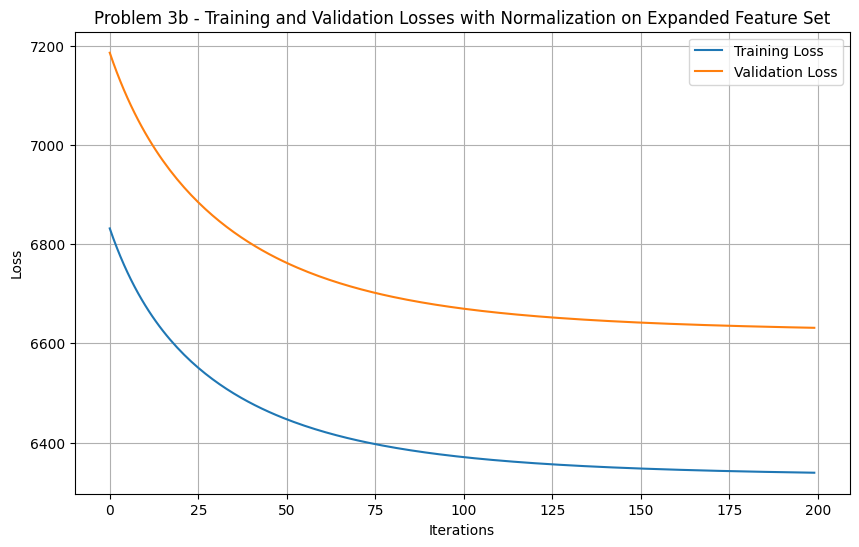

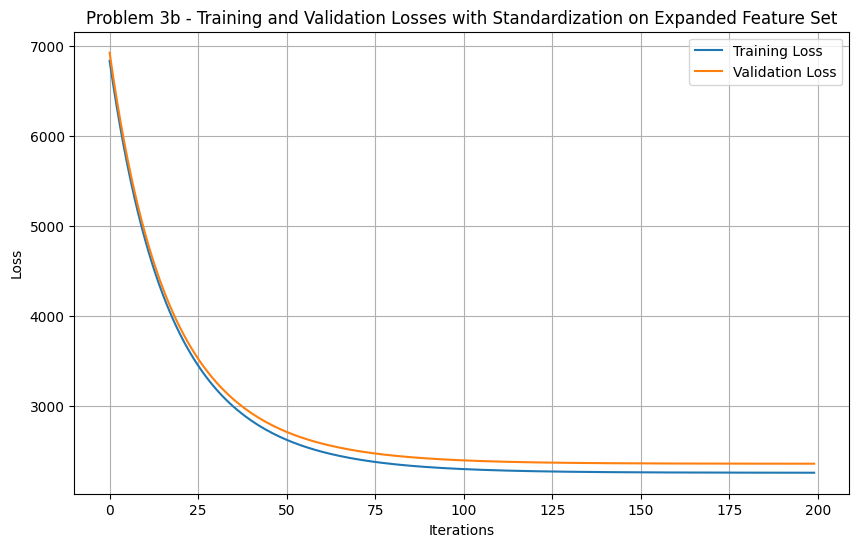

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Generating synthetic data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshaping y to be a column vector

# Simulating additional categorical feature
categorical_feature = np.random.randint(0, 3, size=(X.shape[0], 1))  # Random categorical data

# One-hot encoding the categorical feature
encoder = OneHotEncoder(sparse=False)
categorical_encoded = encoder.fit_transform(categorical_feature)

# Expanding the feature set to include the one-hot encoded categorical feature
X_expanded = np.hstack((X, categorical_encoded))

# Splitting the expanded dataset into training and validation sets
X_train_expanded, X_val_expanded, y_train, y_val = train_test_split(X_expanded, y, test_size=0.2, random_state=42)

# Gradient Descent with Penalty Function
def gradient_descent_penalty(X_train, X_val, y_train, y_val, learning_rate, n_iterations, penalty):
    m = len(y_train)
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]  # Adding bias term
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]  # Adding bias term for validation data

    theta = np.zeros((X_train.shape[1] + 1, 1))  # Initializing theta

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        predictions = X_b_train.dot(theta)
        errors = predictions - y_train
        gradients = 2/m * X_b_train.T.dot(errors)
        gradients[1:] += (2 * penalty / m) * theta[1:]  # L2 regularization for non-bias terms
        theta -= learning_rate * gradients

        train_loss = np.mean(errors ** 2)
        val_loss = np.mean((X_b_val.dot(theta) - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# Normalization and Standardization
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

X_train_norm_expanded = scaler_norm.fit_transform(X_train_expanded)
X_val_norm_expanded = scaler_norm.transform(X_val_expanded)

X_train_std_expanded = scaler_std.fit_transform(X_train_expanded)
X_val_std_expanded = scaler_std.transform(X_val_expanded)

# Applying gradient descent with penalty
penalty = 100  # Adjust the penalty term as needed
learning_rate = 0.01
n_iterations = 200

# Normalized Data
train_losses_norm_expanded, val_losses_norm_expanded, theta_norm_expanded = gradient_descent_penalty(X_train_norm_expanded, X_val_norm_expanded, y_train, y_val, learning_rate, n_iterations, penalty)

# Standardized Data
train_losses_std_expanded, val_losses_std_expanded, theta_std_expanded = gradient_descent_penalty(X_train_std_expanded, X_val_std_expanded, y_train, y_val, learning_rate, n_iterations, penalty)

# Plotting function
def plot_losses(train_losses, val_losses, title):
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label="Training Loss")
    plt.plot(val_losses, label="Validation Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Plotting the results
plot_losses(train_losses_norm_expanded, val_losses_norm_expanded, "Problem 3b - Training and Validation Losses with Normalization on Expanded Feature Set")
plot_losses(train_losses_std_expanded, val_losses_std_expanded, "Problem 3b - Training and Validation Losses with Standardization on Expanded Feature Set")



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Generating synthetic data for demonstration
X, y = make_regression(n_samples=100, n_features=3, noise=0.1, random_state=42)
y = y.reshape(-1, 1)  # Reshaping y to be a column vector

# Splitting the synthetic data into training and validation sets for Problem 3a
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Generating expanded feature set for Problem 3b (for demonstration)
X_expanded = np.hstack((X, X**2))  # Example of expanding features, here by adding squared terms

# Splitting the expanded synthetic data into training and validation sets for Problem 3b
X_train_expanded, X_val_expanded, y_train_expanded, y_val_expanded = train_test_split(X_expanded, y, test_size=0.2, random_state=42)

# Gradient Descent with Penalty Function
def gradient_descent_penalty(X_train, X_val, y_train, y_val, learning_rate, n_iterations, penalty):
    m = len(y_train)
    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]  # Adding bias term
    X_b_val = np.c_[np.ones((len(X_val), 1)), X_val]  # Adding bias term for validation data

    theta = np.zeros((X_train.shape[1] + 1, 1))  # Initializing theta

    train_losses = []
    val_losses = []

    for iteration in range(n_iterations):
        predictions = X_b_train.dot(theta)
        errors = predictions - y_train
        gradients = 2/m * X_b_train.T.dot(errors)
        gradients[1:] += (2 * penalty / m) * theta[1:]  # Adding L2 penalty for regularization
        theta -= learning_rate * gradients

        train_loss = np.mean(errors ** 2)
        val_loss = np.mean((X_b_val.dot(theta) - y_val) ** 2)

        train_losses.append(train_loss)
        val_losses.append(val_loss)

    return train_losses, val_losses, theta

# Apply normalization and standardization for both Problem 3a and 3b datasets
scaler_norm = MinMaxScaler()
scaler_std = StandardScaler()

# Normalized data for Problem 3a
X_train_norm = scaler_norm.fit_transform(X_train)
X_val_norm = scaler_norm.transform(X_val)

# Normalized data for Problem 3b
X_train_expanded_norm = scaler_norm.fit_transform(X_train_expanded)
X_val_expanded_norm = scaler_norm.transform(X_val_expanded)

# Standardized data for Problem 3b
X_train_expanded_std = scaler_std.fit_transform(X_train_expanded)
X_val_expanded_std = scaler_std.transform(X_val_expanded)

# Training with gradient descent and penalty
penalty = 100
learning_rate = 0.01
n_iterations = 200

# For Problem 3a (normalized data)
train_losses_3a, val_losses_3a, theta_3a = gradient_descent_penalty(X_train_norm, X_val_norm, y_train, y_val, learning_rate, n_iterations, penalty)

# For Problem 3b (normalized and standardized data)
train_losses_3b_norm, val_losses_3b_norm, theta_3b_norm = gradient_descent_penalty(X_train_expanded_norm, X_val_expanded_norm, y_train_expanded, y_val_expanded, learning_rate, n_iterations, penalty)
train_losses_3b_std, val_losses_3b_std, theta_3b_std = gradient_descent_penalty(X_train_expanded_std, X_val_expanded_std, y_train_expanded, y_val_expanded, learning_rate, n_iterations, penalty)

# Print the best parameters
print("Best parameters for Problem 3a:", theta_3a.flatten())
print("Best parameters for Problem 3b (normalized):", theta_3b_norm.flatten())
print("Best parameters for Problem 3b (standardized):", theta_3b_std.flatten())


Best parameters for Problem 3a: [-1.36404165  2.24272322 12.11840735  0.07745809]
Best parameters for Problem 3b (normalized): [-1.8176533   2.20112218 12.05638301  0.02471323  2.26831681  2.81369281
 -2.34764623]
Best parameters for Problem 3b (standardized): [ 5.48736068  7.75911547 33.84080772  2.42633307  3.49444624  5.21703157
 -6.15530503]
